## Theory Walk-Through 
### Bar chart
### Histogram
### Scatterplot
### Sampling Data

In [2]:
# installing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import data
path = r'C:\Users\darii\Documents\10-2023 Instacart Basket Analysis'
ords_prods_merged=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.8.pkl'))

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

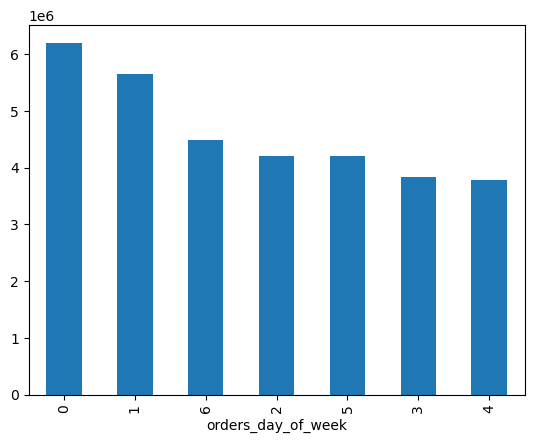

In [5]:
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

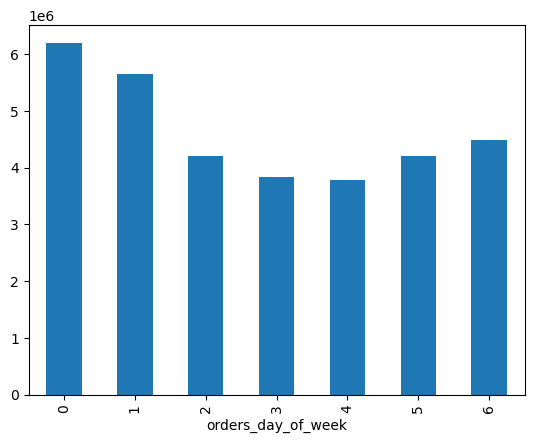

In [6]:
# keeping the order
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

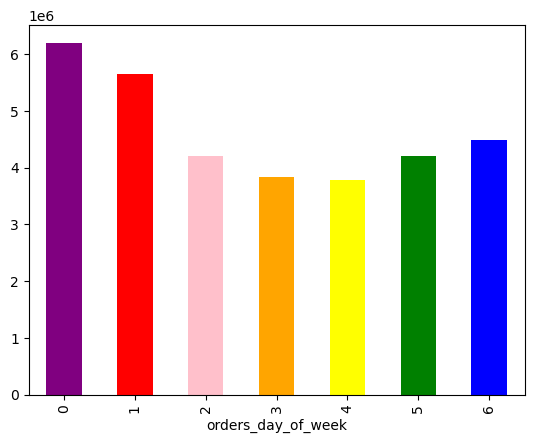

In [7]:
# adding colors
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Histogram

<Axes: ylabel='Frequency'>

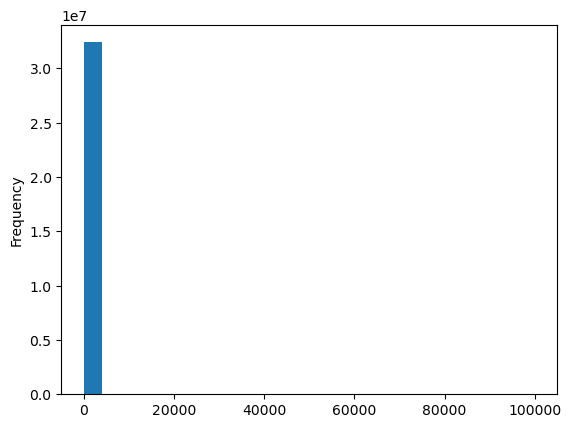

In [9]:
ords_prods_merged['prices'].plot.hist(bins = 25)

### Scatterplot

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

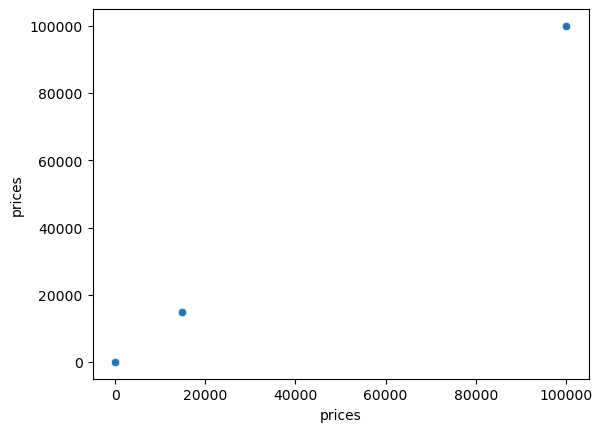

In [10]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [12]:
# chech high values
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spender_flag,median_days_since_prior_order,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [13]:
# NaN for outliers
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [15]:
# check
ords_prods_merged['prices'].max()

25.0

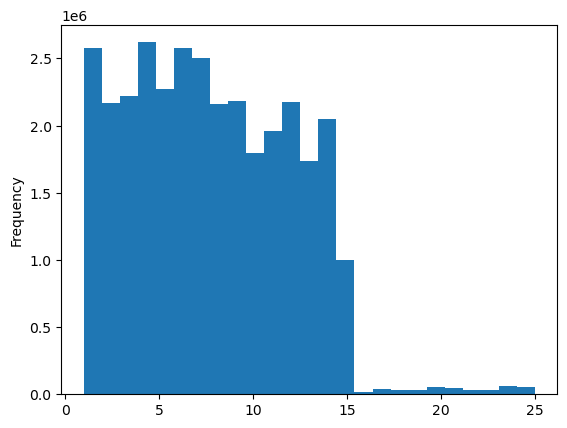

In [17]:
# histogram after cleaning the outliers
hist = ords_prods_merged['prices'].plot.hist(bins = 25)

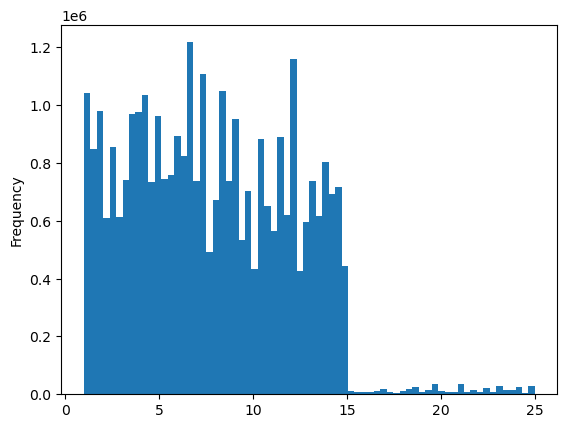

In [18]:
# more bins
hist_2 = ords_prods_merged['prices'].plot.hist(bins = 70)

In [19]:
# export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### Sampling Data

In [21]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# 70% data
big = ords_prods_merged[dev]

In [24]:
# 30% data
small = ords_prods_merged[~dev]

In [25]:
# check
len(ords_prods_merged)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
# reducing columns to only necessary
df_2 = small[['orders_day_of_week','prices']]

### Line Chart

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

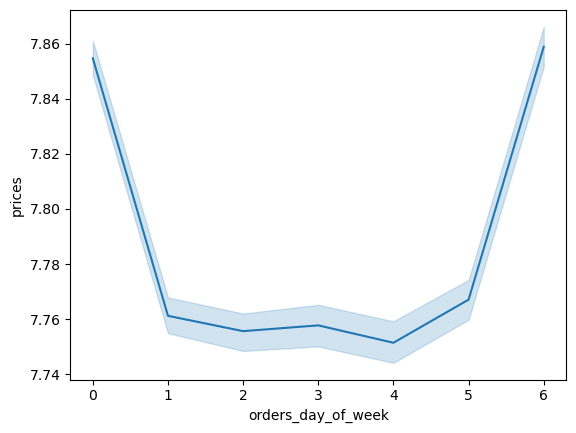

In [28]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [29]:
# export line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_proces_weekdays.png'))